In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as np
import scanpy.external as sce

In [3]:
sc.settings.verbosity = 3  
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(5, 5))

-----
anndata     0.9.1
scanpy      1.9.3
-----
PIL                         9.1.1
anyio                       NA
asciitree                   NA
attr                        21.2.0
babel                       2.9.1
backcall                    0.2.0
brotli                      NA
certifi                     2022.12.07
cffi                        1.15.0
charset_normalizer          2.0.7
cloudpickle                 2.2.0
colorama                    0.4.6
cycler                      0.10.0
cython_runtime              NA
cytoolz                     0.12.1
dask                        2023.5.1
dateutil                    2.8.2
debugpy                     1.5.0
decorator                   5.1.1
defusedxml                  0.7.1
dill                        0.3.6
entrypoints                 0.3
fasteners                   0.18
fastjsonschema              NA
google                      NA
h5py                        3.7.0
idna                        3.3
igraph                      0.10.3
ipykernel 

In [4]:
# samples_dict = {"Immature": "A0021_043", "0hr": "A0008_041", "1hr": "A0021_044", "4hr": "A0008_045", "4hr_replicate": "A0021_042", "6hr": "A0021_045", "8hr": "A0008_044", "8hr_replicate": "A0021_038", "11hr": "A0008_046", "12hr": "A0021_046"}
samples_dict = {"Immature": "A0021_043", "0hr": "A0008_041", "1hr": "A0021_044", "4hr": "A0021_042", "6hr": "A0021_045", "8hr": "A0008_044", "11hr": "A0008_046", "12hr": "A0021_046"}

In [5]:
s_genes = list(pd.read_csv("./../../../../MouseInfection/s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../../../../MouseInfection/g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)

['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


In [ ]:
adata_ovary_combined = sc.read_h5ad("./../../pyobjs_github/adata_ovary_combined_processed_deconvoluted_newscaling.h5ad")
adata_ovary_combined

In [ ]:
adata_dict = dict()
for sample in samples_dict.keys():
        adata_dict[sample] = sc.read_h5ad("./../../pyobjs_github/adata_"+ sample + "_with_image_processed_undertissue_filtered_reprocessed_refiltered_integrated.h5ad")

In [ ]:
granulosa_dict = dict()
for sample in samples_dict.keys():
    granulosa_dict[sample] = adata_dict[sample].raw.to_adata()[adata_dict[sample].obs["Level0_max_pred_celltype"] == "Level0_Granulosa"]
    granulosa_dict[sample].obs["Selection"] = "Granulosa"
    print(granulosa_dict[sample].shape)

In [ ]:
for sample in samples_dict.keys():
    print(granulosa_dict[sample].shape)
    sc.pp.highly_variable_genes(granulosa_dict[sample], max_mean=3)
    sc.pl.highly_variable_genes(granulosa_dict[sample])
    sc.tl.score_genes_cell_cycle(granulosa_dict[sample], s_genes=s_genes, g2m_genes=g2m_genes)
    granulosa_dict[sample].raw = granulosa_dict[sample]
    granulosa_dict[sample] = granulosa_dict[sample][:, granulosa_dict[sample].var.highly_variable]
    print(granulosa_dict[sample].shape)
    sc.pp.regress_out(granulosa_dict[sample], ['S_score', 'G2M_score', 'total_counts'])
    sc.pp.scale(granulosa_dict[sample], max_value=10)
    sc.pp.pca(granulosa_dict[sample], random_state= 0)
    

In [ ]:
for sample in samples_dict.keys():
    sc.pp.neighbors(granulosa_dict[sample], n_pcs=20)
    sc.tl.umap(granulosa_dict[sample])

In [ ]:
for sample in samples_dict.keys():
    sc.tl.leiden(granulosa_dict[sample], key_added="granulosa_leiden_1.0",  resolution = 1.0)

In [ ]:
for sample in samples_dict.keys():
    print(granulosa_dict[sample].shape)
    sc.tl.rank_genes_groups(granulosa_dict[sample], groupby="granulosa_leiden_1.0", key_added="markers_granulosa_leiden_1.0")

In [ ]:
sc.pl.spatial(granulosa_dict["Immature"], color = "Kctd14", spot_size=30)

In [ ]:
sc.tl.leiden(granulosa_dict["Immature"], key_added="granulosa_leiden_1.2",  resolution = 1.2)
sc.tl.rank_genes_groups(granulosa_dict["Immature"], groupby="granulosa_leiden_1.2", key_added="markers_granulosa_leiden_1.2")

In [ ]:
sample = "Immature"
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=6, frameon=True, figsize=(5, 2))
ax = sc.pl.correlation_matrix(granulosa_dict[sample], 'granulosa_leiden_1.2', figsize=(3,2))

In [ ]:
sample = "Immature"
granulosa_dict[sample].obs["granulosa_clusters"] = granulosa_dict[sample].obs["granulosa_leiden_1.2"]
celltypes = {'1': "GC_Mural_Outer-(Atretic)", 
             '0': "GC_Mural-(Small Antral)", 
            '2': "GC_Mural_Inner-(Atretic)", 
            '3': "Others",
            '4': "Mixed",
            '5': "GC_Mural-(Preantral)",
            '6': "GC_Mural_Inner-(Atretic)",
            '7': "GC_Mitotic-(Antral)",
            '8': "GC_Mural_Inner-(Atretic)",
            '9': "GC_Mural_Outer-(Atretic)",
            '10': "GC_Mitotic-(Antral)",
            '11': "Others",
             '12': "Others"}
granulosa_dict[sample].obs["granulosa_celltypes"] = granulosa_dict[sample].obs["granulosa_clusters"].map(celltypes).astype("category")

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=20, frameon=True, figsize=(2, 2))
sc.pl.rank_genes_groups_dotplot(granulosa_dict["Immature"], key="markers_granulosa_leiden_1.2", n_genes=10, values_to_plot='logfoldchanges', min_logfoldchange=0.5, vmax=7, vmin=-7, cmap='bwr')
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=8, frameon=True, figsize=(2, 2))


In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2))
sc.pl.spatial(granulosa_dict["Immature"], color=["phase", "granulosa_leiden_1.2", "granulosa_celltypes"], spot_size=30, frameon=False, wspace=0.3)    

In [ ]:
sc.tl.leiden(granulosa_dict["0hr"], key_added="granulosa_leiden_1.2",  resolution = 1.2)
sc.tl.rank_genes_groups(granulosa_dict["0hr"], groupby="granulosa_leiden_1.2", key_added="markers_granulosa_leiden_1.2")

In [ ]:
sample = "0hr"
ax = sc.pl.correlation_matrix(granulosa_dict[sample], 'granulosa_leiden_1.0', figsize=(2,2))

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=20, frameon=True, figsize=(2, 2))
sc.pl.rank_genes_groups_dotplot(granulosa_dict["0hr"], key="markers_granulosa_leiden_1.0", n_genes=10, values_to_plot='logfoldchanges', min_logfoldchange=1, vmax=7, vmin=-7, cmap='bwr')
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=8, frameon=True, figsize=(2, 2))


In [ ]:
sample = "0hr"
granulosa_dict[sample].obs["granulosa_clusters"] = granulosa_dict[sample].obs["granulosa_leiden_1.0"]
celltypes = {'0': "GC_Mural-(Preantral)", 
             '1': "GC_Mural_Inner-(Antral)", 
            '2': "GC_Mural_Outer-(Antral)", 
            '3': "GC_Mural_Outer-(Atretic)", 
            '4': "GC_Lytic", 
            '5': "Others",
            '6': "GC_Cumulus"}
granulosa_dict[sample].obs["granulosa_celltypes"] = granulosa_dict[sample].obs["granulosa_clusters"].map(celltypes).astype("category")

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2))
sc.pl.spatial(granulosa_dict["0hr"], color=["phase", "granulosa_clusters", "granulosa_celltypes"], spot_size=30, frameon=False, wspace=0.3)  

In [ ]:
sample = "1hr"
ax = sc.pl.correlation_matrix(granulosa_dict[sample], 'granulosa_leiden_1.0', figsize=(2,2))

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=20, frameon=True, figsize=(2, 2))
sc.pl.rank_genes_groups_dotplot(granulosa_dict["1hr"], key="markers_granulosa_leiden_1.0", n_genes=10, values_to_plot='logfoldchanges', min_logfoldchange=0.5, vmax=7, vmin=-7, cmap='bwr')
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=8, frameon=True, figsize=(2, 2))

In [ ]:
sample = "1hr"
granulosa_dict[sample].obs["granulosa_clusters"] = granulosa_dict[sample].obs["granulosa_leiden_1.0"]
celltypes = {'0': "GC_Mural_Outer-(Antral)", 
             '1': "GC_Mural_Outer-(Atretic)", 
            '2': "GC_Mural_Inner-(Antral)", 
            '3': "GC_Mural_Outer-(Antral)", 
            '4': "Others", 
            '5': "GC_Lytic", 
            '6': "GC_Cumulus",
            '7': "Others",
            '8': "Others"}
granulosa_dict[sample].obs["granulosa_celltypes"] = granulosa_dict[sample].obs["granulosa_clusters"].map(celltypes).astype("category")

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2))
sc.pl.spatial(granulosa_dict["1hr"], color=["phase", "granulosa_leiden_1.0", "granulosa_celltypes"], spot_size=30, frameon=False, wspace=0.3)  

In [ ]:
sample = "4hr"
ax = sc.pl.correlation_matrix(granulosa_dict[sample], 'granulosa_leiden_1.0', figsize=(2,2))

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=20, frameon=True, figsize=(2, 2))
sc.pl.rank_genes_groups_dotplot(granulosa_dict["4hr"], key="markers_granulosa_leiden_1.0", n_genes=10, values_to_plot='logfoldchanges', min_logfoldchange=0.5, vmax=7, vmin=-7, cmap='bwr')
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=8, frameon=True, figsize=(2, 2))

In [ ]:
sample = "4hr"
ax = sc.pl.correlation_matrix(granulosa_dict[sample], 'granulosa_leiden_1.0', figsize=(2,2))

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=20, frameon=True, figsize=(2, 2))
sc.pl.rank_genes_groups_dotplot(granulosa_dict["4hr"], key="markers_granulosa_leiden_1.0", n_genes=10, values_to_plot='logfoldchanges', min_logfoldchange=1.0, vmax=7, vmin=-7, cmap='bwr')
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=8, frameon=True, figsize=(2, 2))

In [ ]:
sample = "4hr"
granulosa_dict[sample].obs["granulosa_clusters"] = granulosa_dict[sample].obs["granulosa_leiden_1.0"]
celltypes = {'0': "GC_Mural_Outer-(Antral)", 
             '1': "GC_Mural_Inner-(Antral)", 
            '2': "GC_Mural_Inner-(Antral)", 
            '3': "GC_Mural_Outer-(Antral)", 
            '4': "GC_Mural_Outer-(Antral)", 
            '5': "GC_Mural-(Preantral)", 
            '6': "GC_Lytic",
            '7': "GC_Mural_Outer-(Atretic)",
            '8': "GC_Cumulus"}
granulosa_dict[sample].obs["granulosa_celltypes"] = granulosa_dict[sample].obs["granulosa_clusters"].map(celltypes).astype("category")

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2))
sc.pl.spatial(granulosa_dict["4hr"], color=["phase", "granulosa_leiden_1.0", "granulosa_celltypes"], spot_size=30, frameon=False, wspace=0.3)  

In [ ]:
sample = "6hr"
ax = sc.pl.correlation_matrix(granulosa_dict[sample], 'granulosa_leiden_1.0', figsize=(2,2))

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=20, frameon=True, figsize=(2, 2))
sc.pl.rank_genes_groups_dotplot(granulosa_dict["6hr"], key="markers_granulosa_leiden_1.0", n_genes=10, values_to_plot='logfoldchanges', min_logfoldchange=0.5, vmax=7, vmin=-7, cmap='bwr')
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=8, frameon=True, figsize=(2, 2))

In [ ]:
sample = "6hr"
granulosa_dict[sample].obs["granulosa_clusters"] = granulosa_dict[sample].obs["granulosa_leiden_1.0"]
celltypes = {'0': "GC_Mural_Inner-(Antral)", 
             '1': "GC_Mural_Outer-(Antral)", 
            '2': "GC_Mural_Outer-(Antral)", 
            '4': "GC_Mural_Inner-(Antral)", 
            '3': "GC_Mural-(Preantral)", 
            '5': "GC_Mural-(Preantral)", 
            '6': "GC_Cumulus",
            '7': "GC_Cumulus", 
            '8': "GC_Lytic"}
granulosa_dict[sample].obs["granulosa_celltypes"] = granulosa_dict[sample].obs["granulosa_clusters"].map(celltypes).astype("category")

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2))
sc.pl.spatial(granulosa_dict["6hr"], color=["phase", "granulosa_leiden_1.0", "granulosa_celltypes"], spot_size=30, frameon=False, wspace=0.3)  

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2))
sc.pl.spatial(granulosa_dict["6hr"], color=["Inha", "Inhbb", "Ccnb2", "Kctd14"], spot_size=30, frameon=False, wspace=0.3)  

In [ ]:
sc.tl.leiden(granulosa_dict["8hr"], key_added="granulosa_leiden_1.2",  resolution = 1.2)
sc.tl.rank_genes_groups(granulosa_dict["8hr"], groupby="granulosa_leiden_1.2", key_added="markers_granulosa_leiden_1.2")

In [ ]:
sample = "8hr"
ax = sc.pl.correlation_matrix(granulosa_dict[sample], 'granulosa_leiden_1.0', figsize=(2,2))

In [ ]:
sample = "8hr"
granulosa_dict[sample].obs["granulosa_clusters"] = granulosa_dict[sample].obs["granulosa_leiden_1.0"]
celltypes = {'0': "GC_Mural_Inner-(Antral)", 
             '1': "GC_Mural_Outer-(Atretic)", 
            '2': "GC_Mural_Outer-(Antral)", 
            '3': "GC_Lytic", 
            '4': "GC_Lytic", 
            '5': "GC_Cumulus", 
            '6': "GC_Mural-(Preantral)",
            '7': "GC_Cumulus", 
            '8': "Others"}
granulosa_dict[sample].obs["granulosa_celltypes"] = granulosa_dict[sample].obs["granulosa_clusters"].map(celltypes).astype("category")

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=20, frameon=True, figsize=(2, 2))
sc.pl.rank_genes_groups_dotplot(granulosa_dict["8hr"], key="markers_granulosa_leiden_1.0", n_genes=10, values_to_plot='logfoldchanges', min_logfoldchange=0.5, vmax=7, vmin=-7, cmap='bwr')
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=8, frameon=True, figsize=(2, 2))

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2))
sc.pl.spatial(granulosa_dict["8hr"], color=["phase", "granulosa_leiden_1.0", "granulosa_celltypes"], spot_size=30, frameon=False, wspace=0.3)  

In [ ]:
sc.tl.leiden(granulosa_dict["11hr"], key_added="granulosa_leiden_1.2",  resolution = 1.2)
sc.tl.rank_genes_groups(granulosa_dict["11hr"], groupby="granulosa_leiden_1.2", key_added="markers_granulosa_leiden_1.2")

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=8, frameon=True, figsize=(4, 2))
sample = "11hr"
ax = sc.pl.correlation_matrix(granulosa_dict[sample], 'granulosa_leiden_1.2', figsize=(2,2))

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=20, frameon=True, figsize=(4, 2))
sc.pl.rank_genes_groups_dotplot(granulosa_dict["11hr"], key="markers_granulosa_leiden_1.5", n_genes=10, values_to_plot='logfoldchanges', min_logfoldchange=1, vmax=7, vmin=-7, cmap='bwr')

In [ ]:
sample = "11hr"
granulosa_dict[sample].obs["granulosa_clusters"] = granulosa_dict[sample].obs["granulosa_leiden_1.2"]
celltypes = {'0': "GC_Mural_Outer-(Antral)", 
             '1': "GC_Mural-(Preantral)", 
            '2': "GC_Mural_Inner-(Antral)", 
             '3': "Others", 
            '4': "GC_Cumulus", 
            '5': "GC_Mural_Outer-(Atretic)", 
            '6': "GC_Cumulus",
            '7': "Others", 
            '8': "Others",
            '9': "GC_Cumulus",
            '10': "GC_Lytic"}
granulosa_dict[sample].obs["granulosa_celltypes"] = granulosa_dict[sample].obs["granulosa_clusters"].map(celltypes).astype("category")

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2))
sc.pl.spatial(granulosa_dict["11hr"], color=["phase", "granulosa_leiden_1.2", "granulosa_celltypes"], spot_size=30, frameon=False, wspace=0.3)


In [ ]:
sample = "12hr"
ax = sc.pl.correlation_matrix(granulosa_dict[sample], 'granulosa_leiden_1.0', figsize=(2,2))

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=20, frameon=True, figsize=(2, 2))
sc.pl.rank_genes_groups_dotplot(granulosa_dict["12hr"], key="markers_granulosa_leiden_1.0", n_genes=10, values_to_plot='logfoldchanges', min_logfoldchange=0.5, vmax=5, vmin=-5, cmap='bwr')
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2))


In [ ]:
sample = "12hr"
granulosa_dict[sample].obs["granulosa_clusters"] = granulosa_dict[sample].obs["granulosa_leiden_1.0"]
celltypes = {'0': "GC_Mural_Outer-(Antral)", 
             '1': "GC_Lytic", 
            '2': "GC_Lytic", 
            '3': "GC_Mural_Outer-(Antral)", 
            '4': "GC_Mural_Inner-(Antral)", 
            '5': "GC_Mural_Outer-(Atretic)", 
            '6': "Others",
            '7': "GC_Mural-(Preantral)", 
            '8': "GC_Cumulus"}
granulosa_dict[sample].obs["granulosa_celltypes"] = granulosa_dict[sample].obs["granulosa_clusters"].map(celltypes).astype("category")

In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2))
sc.pl.spatial(granulosa_dict["12hr"], color=["phase", "granulosa_leiden_1.0", "granulosa_celltypes"], spot_size=30, frameon=False, wspace=0.3)


In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2))
sc.pl.spatial(granulosa_dict["12hr"], color=["Gm2a", "Clu", "Rhox8", "Edn2"], spot_size=30, frameon=False, wspace=0.3)


In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2))
sc.pl.spatial(granulosa_dict["11hr"], color=["Clu", "Gm2a", "Rhox8", "Ctsl"], spot_size=30, frameon=False, wspace=0.3)


In [ ]:
for sample in granulosa_dict.keys():
        print(granulosa_dict[sample].shape)
        granulosa_dict[sample].write_h5ad("./../../pyobjs_github/granulosa_adata_"+ sample + "_with_image_processed_undertissue_filtered_reprocessed_integrated_individual_reprocessed_newscaling.h5ad")        

In [ ]:
granulosa_dict["4hr"].obs_names = [x.replace("4hr_replicate", "4hr") for x in granulosa_dict["4hr"].obs_names]

In [ ]:
granulosa_dict["4hr"].obs["Sample"] = granulosa_dict["4hr"].obs["Sample"].cat.rename_categories({"4hr_replicate": "4hr"})

In [ ]:
granulosa_dict = dict()
for sample in samples_dict.keys():
        granulosa_dict[sample] = sc.read_h5ad("./../../pyobjs_github//granulosa_adata_"+ sample + "_with_image_processed_undertissue_filtered_reprocessed_integrated_individual_reprocessed_newscaling.h5ad")
        print(granulosa_dict[sample].shape)
        #  granulosa_dict[sample].uns['log1p']["base"] = None

In [ ]:
granulosa_combined = granulosa_dict[list(samples_dict.keys())[0]].raw.to_adata().concatenate([granulosa_dict[x].raw.to_adata() for x in list(samples_dict.keys())[1:]], batch_categories=list(samples_dict.keys()))
granulosa_combined.obs_names = [x.split("-")[0] + "-" + x.split("-")[1] for x in granulosa_combined.obs_names]
granulosa_combined

In [ ]:
granulosa_combined.obs["granulosa_celltypes"].cat.categories

In [ ]:
granulosa_combined.obs["granulosa_celltypes"] = granulosa_combined.obs["granulosa_celltypes"].astype("category")
granulosa_combined.obs["granulosa_celltypes"].cat.reorder_categories(
    new_categories = ['GC_Mural_Outer-(Antral)', 'GC_Mural_Inner-(Antral)', 'GC_Mural-(Small Antral)',
                      'GC_Mural_Outer-(Atretic)', 'GC_Mural_Inner-(Atretic)', 
                      'GC_Cumulus', 'GC_Lytic', 'GC_Mitotic-(Antral)',
                       'GC_Mural-(Preantral)', 'Others', "Mixed"], inplace = True)

In [ ]:
granulosa_combined.obs["granulosa_celltypes_reduced"] = granulosa_combined.obs["granulosa_celltypes"]
celltypes = {'GC_Mural-(Preantral)': 'GC_Mural-(Preantral)',
             'GC_Mural_Outer-(Antral)': "GC_Mural-(Antral)",
             'GC_Mural_Inner-(Antral)': "GC_Mural-(Antral)",
            'GC_Mural-(Small Antral)': "GC_Mural-(Antral)",
             'GC_Mural_Outer-(Atretic)': "GC_Mural-(Atretic)",
            'GC_Mural_Inner-(Atretic)': "GC_Mural-(Atretic)",
            'GC_Cumulus':'GC_Cumulus-(Mixed)',
            'GC_Lytic': 'GC_Lytic-(Lytic)',
            'GC_Mitotic-(Antral)': 'GC_Mitotic-(Antral)',
            'Others': "Others",
            "Mixed": "Mixed"}
granulosa_combined.obs["granulosa_celltypes_reduced"] = granulosa_combined.obs["granulosa_celltypes_reduced"].map(celltypes).astype("category")

In [ ]:
granulosa_combined.obs["granulosa_celltypes_reduced"] = granulosa_combined.obs["granulosa_celltypes_reduced"].astype("category")
granulosa_combined.obs["granulosa_celltypes_reduced"].cat.reorder_categories(
    new_categories = ['GC_Mural-(Preantral)',  'GC_Mural-(Antral)', 'GC_Mural-(Atretic)',
                    'GC_Cumulus-(Mixed)', 'GC_Mitotic-(Antral)', 'GC_Lytic-(Lytic)', "Mixed", "Others"], inplace = True)

In [ ]:
granulosa_combined.write_h5ad("./../../pyobjs_github/granulosa_individual_combined_newscaling.h5ad")

In [7]:
granulosa_combined = sc.read_h5ad("./../../pyobjs_github/granulosa_individual_combined_newscaling.h5ad")

In [14]:
granulosa_combined = granulosa_combined[~granulosa_combined.obs["granulosa_celltypes_reduced"].isin(["Mixed", "Others"])]

In [27]:
sc.tl.rank_genes_groups(granulosa_combined, groupby="granulosa_celltypes_reduced", key_added="rank_gene_groups_granulosa_celltype_reduced", method="wilcoxon")

ranking genes
    finished: added to `.uns['rank_gene_groups_granulosa_celltype_reduced']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:03:05)


In [28]:
sc.tl.dendrogram(granulosa_combined, groupby="granulosa_celltypes_reduced")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_granulosa_celltypes_reduced']`


/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


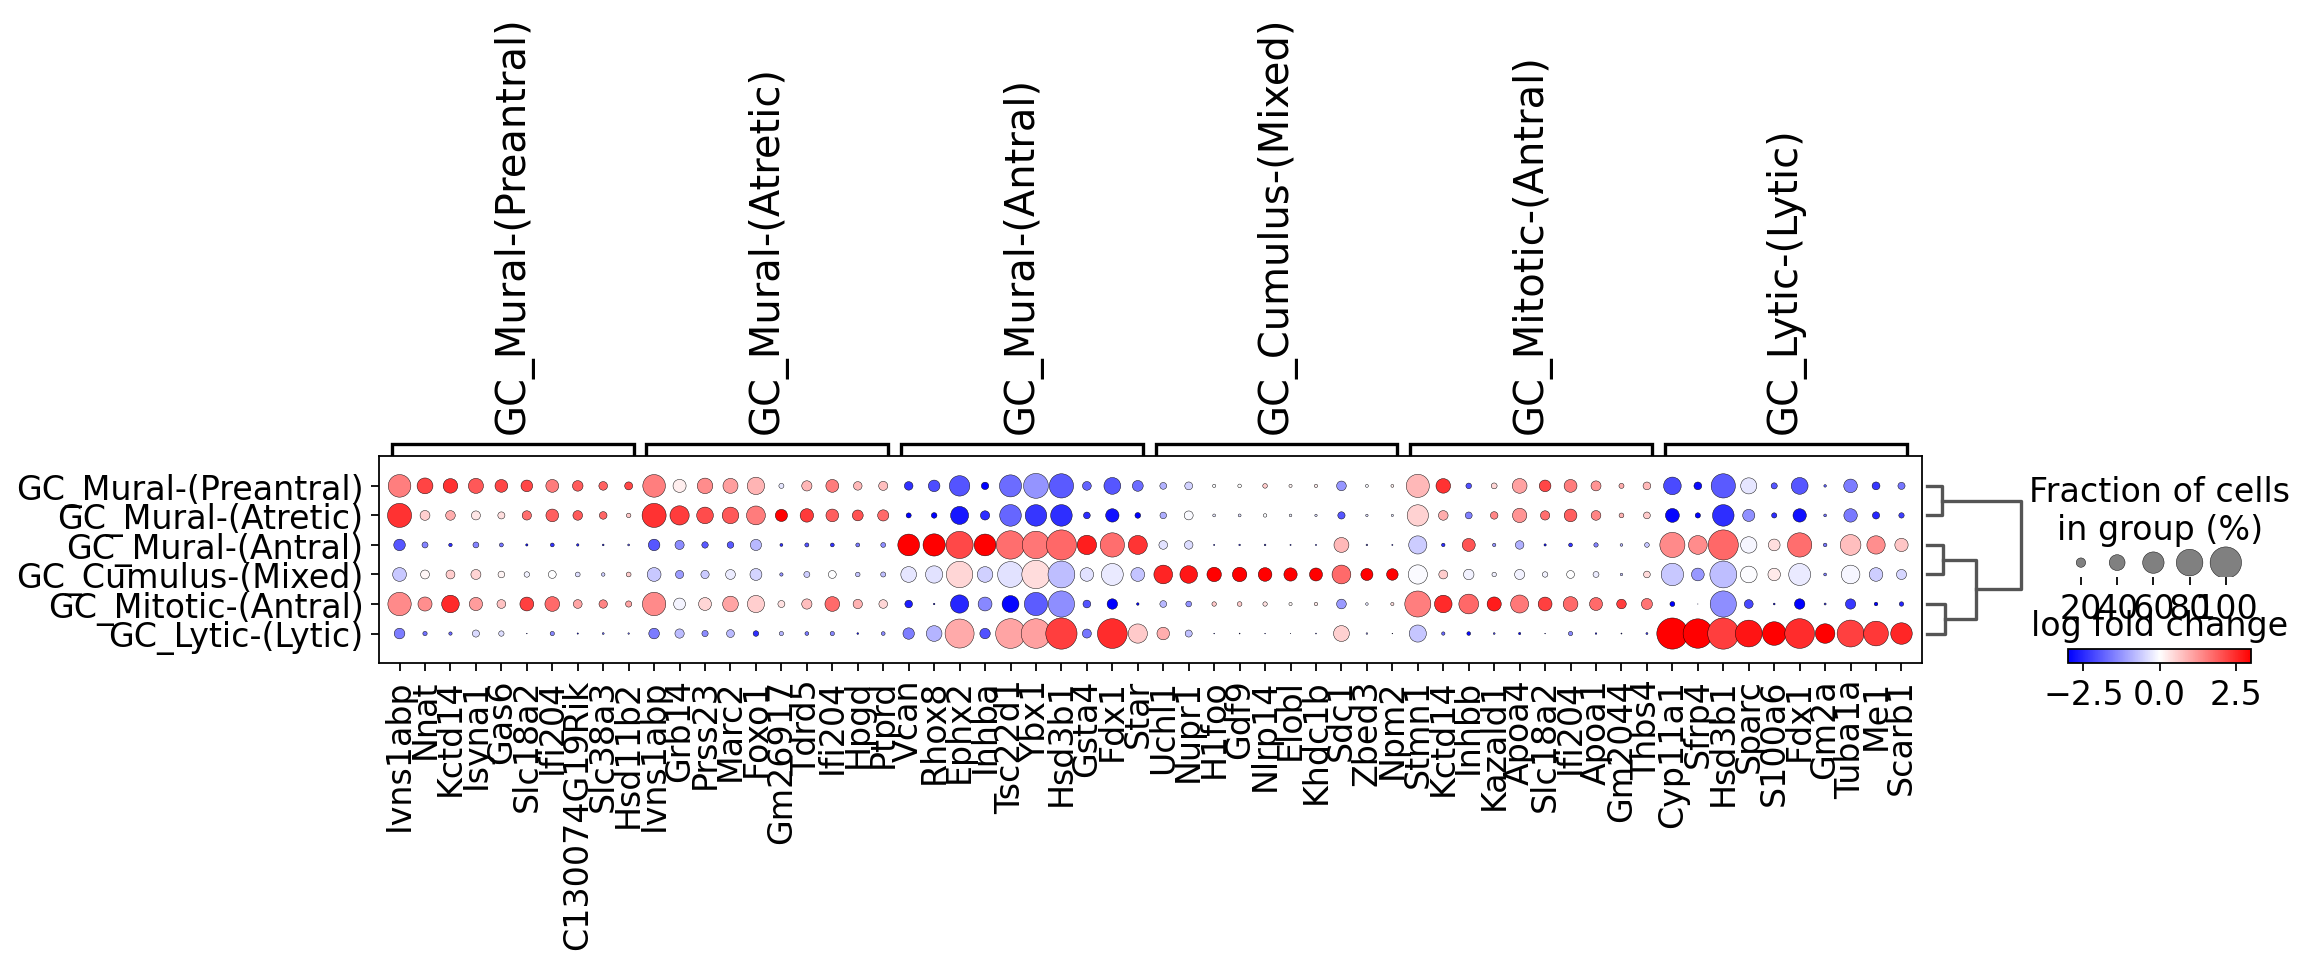

In [29]:
sc.settings.set_figure_params(dpi=80, fontsize=18, facecolor='white', frameon=True, figsize=(8, 5))
sc.pl.rank_genes_groups_dotplot(granulosa_combined, n_genes=10, key="rank_gene_groups_granulosa_celltype_reduced", values_to_plot='logfoldchanges', cmap='bwr', min_logfoldchange=1.5, vmin = -3.0, vmax = 3.0, figsize = (15,1.7), save="granulosa_subtype_markers")
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(2, 2))

In [30]:
marker_list = list()
for group in granulosa_combined.uns['rank_gene_groups_granulosa_celltype_reduced']['names'].dtype.names:
    markers = sc.get.rank_genes_groups_df(granulosa_combined, key='rank_gene_groups_granulosa_celltype_reduced', group = group).head(50)
    markers["celltypes"] = group
    marker_list.append(markers)

In [31]:
marker_list

[       names     scores  logfoldchanges          pvals      pvals_adj  \
 0       Rps6  63.638859        1.037066   0.000000e+00   0.000000e+00   
 1      Rps4x  52.048664        1.072246   0.000000e+00   0.000000e+00   
 2      Rpl12  50.713943        1.154154   0.000000e+00   0.000000e+00   
 3       Rps5  50.658615        1.041322   0.000000e+00   0.000000e+00   
 4       Npm1  50.383835        1.206900   0.000000e+00   0.000000e+00   
 5       Rps8  45.614933        0.857241   0.000000e+00   0.000000e+00   
 6      Rps12  45.598019        0.923703   0.000000e+00   0.000000e+00   
 7     Eef1b2  45.446285        1.115458   0.000000e+00   0.000000e+00   
 8       Rpsa  44.689480        1.068627   0.000000e+00   0.000000e+00   
 9      Rpl23  43.970558        0.703184   0.000000e+00   0.000000e+00   
 10     Rpl14  43.696022        1.117803   0.000000e+00   0.000000e+00   
 11     Rpl32  43.601833        0.990859   0.000000e+00   0.000000e+00   
 12      Rpl5  42.552311        0.8608

In [32]:
pd.concat(marker_list).to_csv("./../../pyobjs_github/SuppTable1.csv", index=False)

In [ ]:
cat_custom = [ 'GC_Mural-(Antral)', 'GC_Mural-(Atretic)', 'GC_Cumulus-(Mixed)', 'GC_Lytic-(Lytic)', 'GC_Mitotic-(Antral)', 
       'GC_Mural-(Preantral)', 'M_Smooth Muscle', 'M_Steroidogenic Theca', 'M_Fibroblast Stroma', 'M_Dividing Mesenchyme',
 'M_Pericyte', 'Oocyte', 'Endothelium', 'Epithelium', 'Immune', "Mixed", "Others"]

In [ ]:
from pylab import *
cmap = cm.get_cmap('tab20')
palette_custom = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
cmap

In [ ]:
sc.settings.set_figure_params(dpi=300, dpi_save= 300, fontsize=6, facecolor='white', frameon=False, figsize=(2.0, 2.0), vector_friendly = True, transparent=True, format="pdf")
grouping_var = "granulosa_celltypes_reduced"
fig, axs = plt.subplots(2,4, figsize = (18,8))
for i, sample in enumerate(samples_dict.keys()):
    subset = granulosa_combined[granulosa_combined.obs["Sample"] == sample]
    subset.obs[grouping_var] = subset.obs[grouping_var].cat.set_categories(cat_custom)
    print(subset.obs[grouping_var].cat.categories)
    if i == 3:
        sc.pl.spatial(subset, color = [grouping_var], palette=palette_custom, wspace= 0.0, hspace = 0.0, spot_size = 30, frameon=False, title=sample, show=False, ax=axs[int(i/4), int(i%4)])
        handles, labels = axs[int(i/4), int(i%4)].get_legend_handles_labels()
        axs[int(i/5), int(i%5)].get_legend().remove()
    else: 
        sc.pl.spatial(subset, color = [grouping_var], palette=palette_custom, wspace= 0.0, hspace = 0.0, spot_size = 30, frameon=False, title=sample, show=False, legend_loc="none", ax=axs[int(i/4), int(i%4)])  
fig.legend(handles, labels, ncol = 1, loc=6, bbox_to_anchor = (1.0,0.5), title = "Cell types")
plt.subplots_adjust(wspace=-0, hspace=0)